# House Prices - Advanced Regression Techniques

## 1. 项目概述

Kaggle页面：https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/

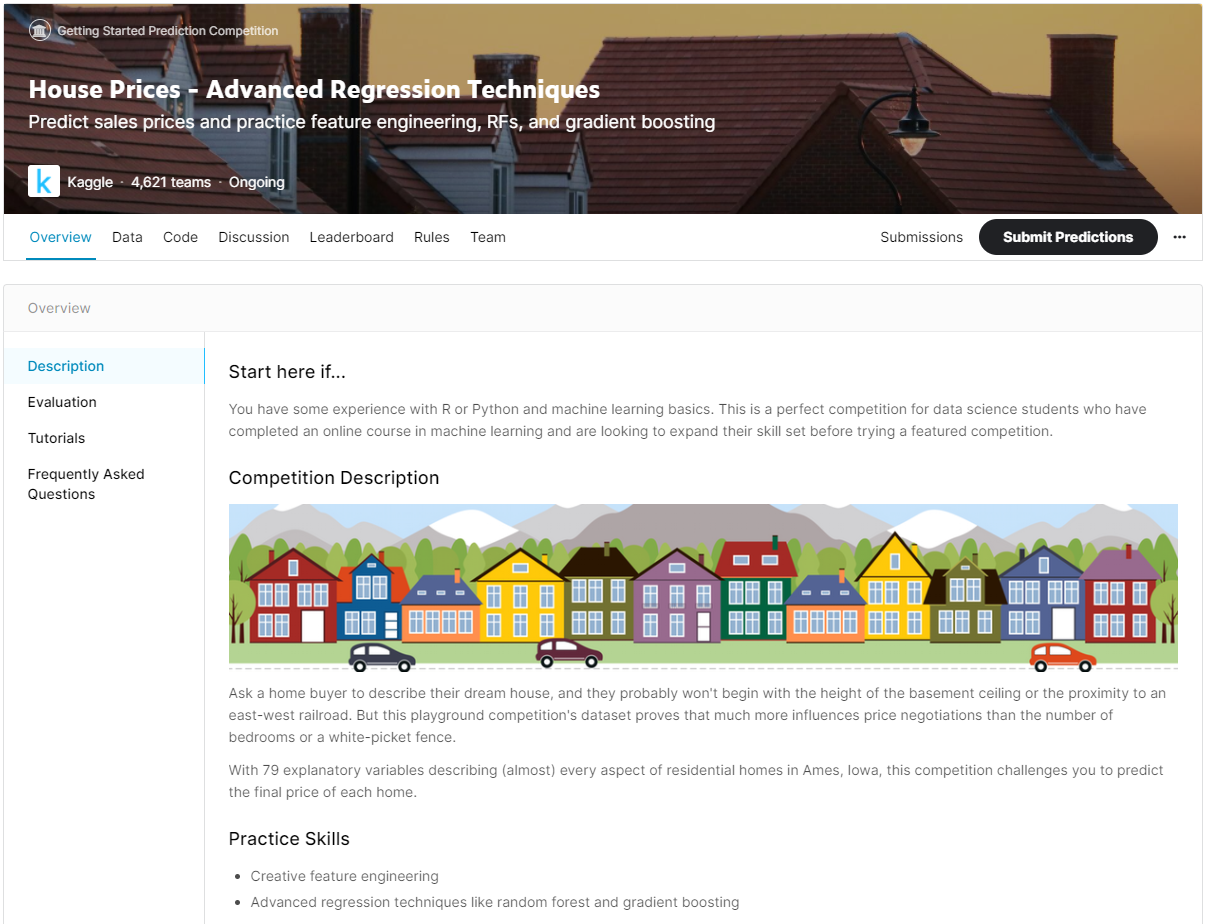

影响房价的因素有很多，在本节的数据集中，79个特征几乎描述了爱荷华州艾姆斯 (Ames, Iowa) 住宅的方方面面，要求预测每套房屋最终的销售价格。当然这里面既有离散型也有连续型特征，而且存在大量的缺失值。且与人们固有印象不同的是，部分因素对房屋价格的影响远大于卧室等人们印象中很重要的因素。

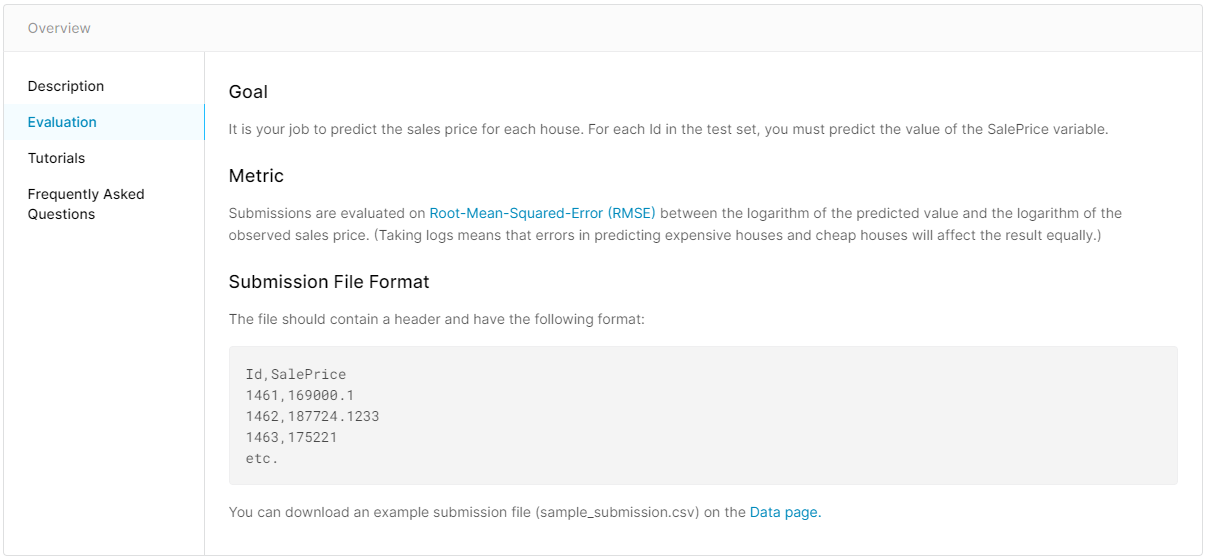

比赛目标非常重要，如果一开始就搞错了可能会南辕北辙。最终要求的是对测试集中的每条数据预测出一个SalePrice，然后与Id合并提交。特别需要注意的是，这里的评价指标是均方根误差 (RMSE) ，这个在第五章模型评价中讲过。

$$RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{real}-y_{predict})^2 } $$

## 2. 数据

train.csv - 训练集

test.csv - 测试集

data_description.txt - 每列的完整描述

sample_submission.csv - 根据销售年份和月份、地块面积和卧室数量进行线性回归的基准提交

其中data_description的描述虽然很全，但并不太直观，下面整理了数据集中各列的含义用作对照：

| 序号 | 变量名        | 含义                                     |
|------|---------------|------------------------------------------|
| 1    | MSSubClass    | 建筑物类型                               |
| 2    | MSZoning      | 房屋销售区域类型                         |
| 3    | LotFrontage   | 与房屋相连街道的距离                     |
| 4    | LotArea       | 房屋占地面积                             |
| 5    | Street        | 连接房屋的道路类型                       |
| 6    | Alley         | 连接房屋的小巷道路类型                   |
| 7    | LotShape      | 房屋的形状                               |
| 8    | LandContour   | 房屋的平坦度                             |
| 9    | Utilities     | 可用的基础设施类型                       |
| 10   | LotConfig     | 房屋外部布局                             |
| 11   | LandSlope     | 房屋的倾斜度                             |
| 12   | Neighborhood  | 埃姆斯市范围内的实际位置                 |
| 13   | Condition1    | 邻近主要道路或铁路                       |
| 14   | Condition2    | 邻近主要道路或铁路，如果有二个存在       |
| 15   | BldgType      | 住宅类型                                 |
| 16   | HouseStyle    | 住宅样式                                 |
| 17   | OverallQual   | 对房子的整体材料和装修评级               |
| 18   | OverallCond   | 房子的整体状况评估                       |
| 19   | YearBuilt     | 初建日期                                 |
| 20   | YearRemodAdd  | 改造日期(如无改造或增加，与初建日期相同) |
| 21   | RoofStyle     | 屋顶类型                                 |
| 22   | RoofMatl      | 屋顶材料                                 |
| 23   | Exterior1st   | 房屋外部遮盖物                           |
| 24   | Exterior2nd   | 房屋外部遮盖物(如果不止一种)             |
| 25   | MasVnrType    | 砖石饰面类型                             |
| 26   | MasVnrArea    | 砖石饰面面积                             |
| 27   | ExterQual     | 外部材料质量评估                         |
| 28   | ExterCond     | 评估外部材料的现状评估                   |
| 29   | Foundation    | 地基类型                                 |
| 30   | BsmtQual      | 地下室高度评估                           |
| 31   | BsmtCond      | 地下室总体情况评估                       |
| 32   | BsmtExposure  | 花园受光程度                             |
| 33   | BsmtFinType1  | 地下室完工面积等级                       |
| 34   | BsmtFinSF1    | 地下室完工面积                           |
| 35   | BsmtFinType2  | 地下室完工面积等级2(如果有多种类型)      |
| 36   | BsmtFinSF2    | 地下室完工等级2的面积                    |
| 37   | BsmtUnfSF     | 地下室未完工面积                         |
| 38   | TotalBsmtSF   | 地下室总面积                             |
| 39   | Heating       | 供暖系统类型                             |
| 40   | HeatingQC     | 供暖系统质量                             |
| 41   | CentralAir    | 中央空调                                 |
| 42   | Electrical    | 电力系统                                 |
| 43   | 1stFlrSF      | 一楼面积                                 |
| 44   | 2ndFlrSF      | 二楼面积                                 |
| 45   | LowQualFinSF  | 所有已完工楼层的低质量面积               |
| 46   | GrLivArea     | 地面以上生活区域面积                     |
| 47   | BsmtFullBath  | 地下室完整浴室数                         |
| 48   | BsmtHalfBath  | 地下室半浴室数                           |
| 49   | FullBath      | 地面以上完整浴室数                       |
| 50   | HalfBath      | 地面以上半浴室数                         |
| 51   | BedroomAbvGr  | 地面以上卧室数(不包括地下室卧室)         |
| 52   | KitchenAbvGr  | 地面以上厨房数                           |
| 53   | KitchenQual   | 厨房质量                                 |
| 54   | TotRmsAbvGrd  | 地面以上总房间数(不包括浴室)             |
| 55   | Functional    | 家庭功能评级                             |
| 56   | Fireplaces    | 壁炉数量                                 |
| 57   | FireplaceQu   | 壁炉质量                                 |
| 58   | GarageType    | 车库位置                                 |
| 59   | GarageYrBlt   | 车库建成年份                             |
| 60   | GarageFinish  | 车库内部完成度                           |
| 61   | GarageCars    | 车库容量                                 |
| 62   | GarageArea    | 车库面积                                 |
| 63   | GarageQual    | 车库质量                                 |
| 64   | GarageCond    | 车库条件                                 |
| 65   | PavedDrive    | 铺砌车道                                 |
| 66   | WoodDeckSF    | 木地板面积                               |
| 67   | OpenPorchSF   | 开放式门廊面积                           |
| 68   | EnclosedPorch | 封闭门廊面积                             |
| 69   | 3SsnPorch     | 三季门廊面积                             |
| 70   | ScreenPorch   | 屏风门廊面积                             |
| 71   | PoolArea      | 游泳池面积                               |
| 72   | PoolQC        | 游泳池质量                               |
| 73   | Fence         | 围墙质量                                 |
| 74   | MiscFeature   | 未涵盖在其他类别的功能                   |
| 75   | MiscVal       | 其它功能的价值                           |
| 76   | MoSold        | 售卖月份                                 |
| 77   | YrSold        | 售卖年份                                 |
| 78   | SaleType      | 销售类型                                 |
| 79   | SaleCondition | 销售情况                                 |
| 80   | SalePrice     | 销售价格                                 |


## 3. 问题解决流程

(1) 数据分析；

(2) 数据预处理；

(3) 特征工程；

(4) 建模、预测和解决问题；

(5) 模型评估；

(6) 提交结果；

## 4. 代码示例

### (1) 加载数据集

In [1]:
import pandas as pd

# 训练集
train_df = pd.read_csv('./house/train.csv')

# 测试集
test_df = pd.read_csv('./house/test.csv')

### (2) 数据预览

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [5]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

### (3) 统计分析

**数据基本信息**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

在训练集中，38个特征是整数或浮点型，43个特征是字符串型

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

在测试集中，37个特征是整数或浮点型，43个特征是字符串型

**特征名**

In [8]:
train_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

**特征验证**

In [9]:
print([x for x in train_df.columns if x not in test_df.columns])
print([x for x in test_df.columns if x not in train_df.columns])

['SalePrice']
[]


**哪些特征包含缺失值**

In [10]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**样本中数值特征的分布**

In [12]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**样本中分类特征的分布**

In [13]:
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


### (4) 可视化数据分析

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**缺失值分布**

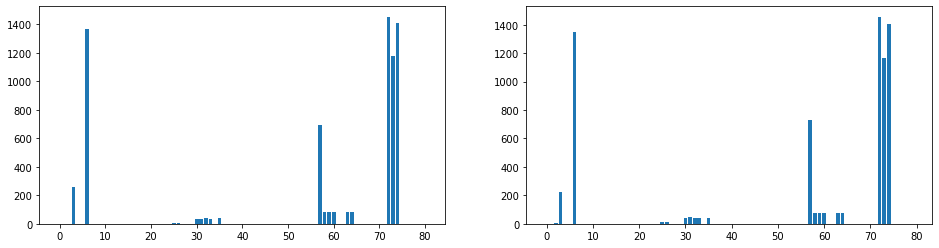

In [15]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.bar(np.arange(train_df.shape[1]), train_df.isnull().sum().values)
plt.subplot(1, 2, 2)
plt.bar(np.arange(test_df.shape[1]), test_df.isnull().sum().values)
plt.show()

**房价分布**

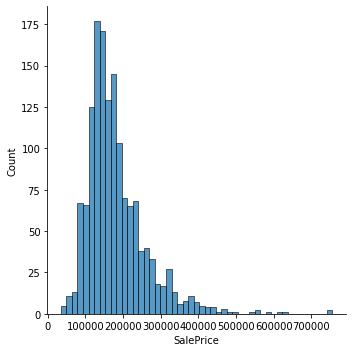

In [16]:
sns.displot(train_df.SalePrice)
plt.show()

**房价与建造年份相关性**

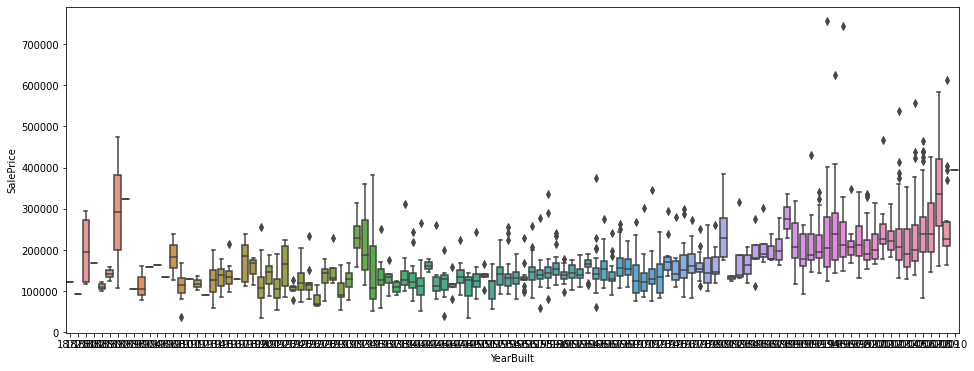

In [17]:
plt.figure(figsize=(16,6))
sns.boxplot(x = train_df.YearBuilt, y = train_df.SalePrice)
plt.show()

**房价与整体评价相关性**

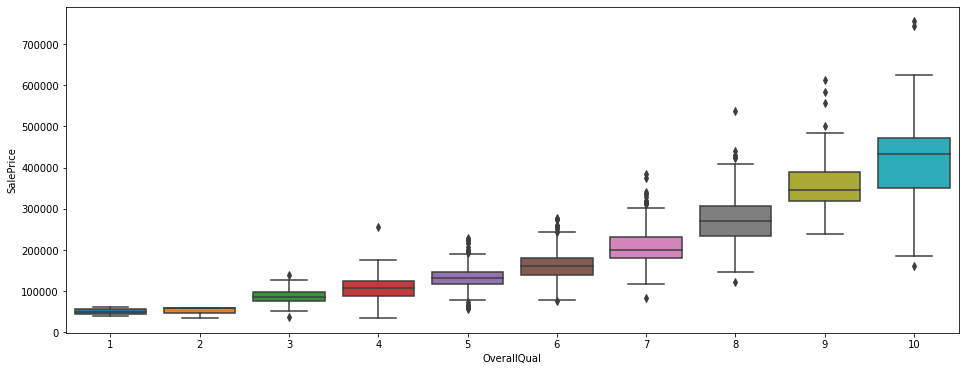

In [18]:
plt.figure(figsize=(16,6))
sns.boxplot(x = train_df.OverallQual, y = train_df.SalePrice)
plt.show()

**房价与居住面积相关性**

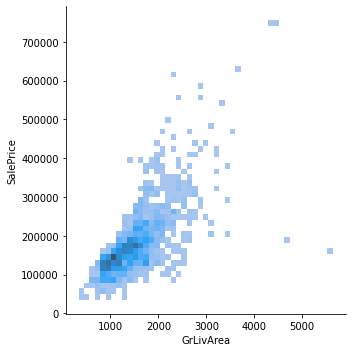

In [19]:
sns.displot(x = train_df.GrLivArea, y = train_df.SalePrice)
plt.show()

**数值特征间的相关关系**

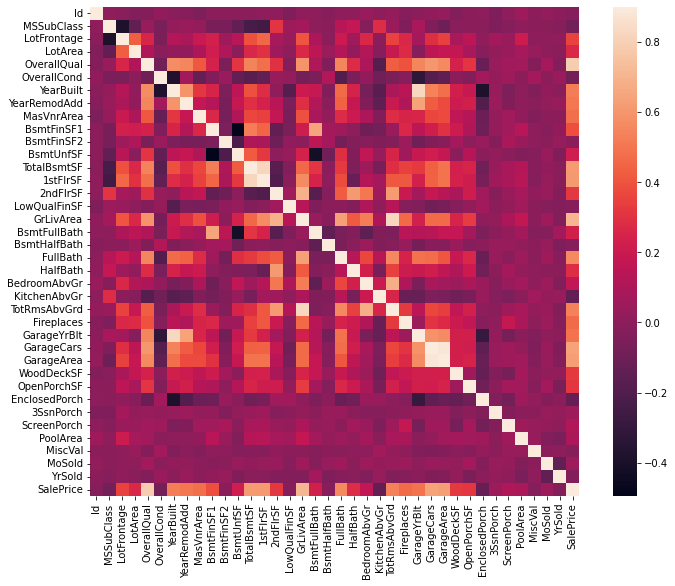

In [20]:
corr = train_df.corr(numeric_only = True)
plt.figure(figsize=(12, 9))
sns.heatmap(corr, vmax = 0.9, square = True)
plt.show()

**相关关系Top-10**

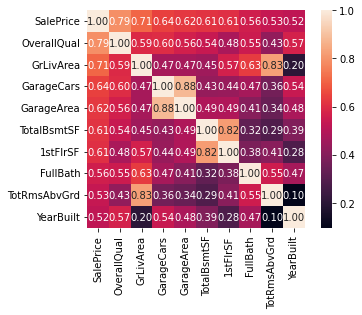

In [21]:
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
# sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### (5) 处理数据

**去掉训练集中的Id和SalePrice，测试集中的Id，拼接成一个特征表**

In [22]:
combine_features = pd.concat((train_df.iloc[:, 1:-1], test_df.iloc[:, 1:]))

**特征类型**

In [23]:
combine_features.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object


**处理数值型特征**

In [24]:
numeric_feature_index = combine_features.dtypes[combine_features.dtypes != 'object'].index

In [25]:
numeric_feature_mean = train_df[numeric_feature_index].mean()
numeric_feature_std = train_df[numeric_feature_index].std()

In [26]:
combine_features[numeric_feature_index] = (combine_features[numeric_feature_index] - numeric_feature_mean) / numeric_feature_std
combine_features[numeric_feature_index] = combine_features[numeric_feature_index].fillna(0)

In [27]:
combine_features[numeric_feature_index]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073350,-0.207948,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.509840,0.575228,-0.288554,-0.944267,-0.459145,-0.793162,1.161454,-0.120201,0.370207,1.107431,-0.240978,0.789470,1.227165,0.163723,-0.211381,0.911897,-0.950901,0.992066,0.311618,0.350880,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730
1,-0.872264,0.409724,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.572637,1.171591,-0.288554,-0.641008,0.466305,0.257052,-0.794891,-0.120201,-0.482347,-0.819684,3.947457,0.789470,-0.761360,0.163723,-0.211381,-0.318574,0.600289,-0.101506,0.311618,-0.060710,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228
2,0.073350,-0.084413,0.073455,0.651256,-0.517023,0.984415,0.829930,0.322063,0.092875,-0.288554,-0.301540,-0.313261,-0.627611,1.188943,-0.120201,0.514836,1.107431,-0.240978,0.789470,1.227165,0.163723,-0.211381,-0.318574,0.600289,0.911061,0.311618,0.631510,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730
3,0.309753,-0.413838,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.572637,-0.499103,-0.288554,-0.061648,-0.687089,-0.521555,0.936955,-0.120201,0.383528,1.107431,-0.240978,-1.025689,-0.761360,0.163723,-0.211381,0.296662,0.600289,0.789553,1.649742,0.790533,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186
4,0.073350,0.574436,0.375020,1.374324,-0.517023,0.951306,0.733056,1.360357,0.463410,-0.288554,-0.174805,0.199611,-0.045596,1.617323,-0.120201,1.298881,1.107431,-0.240978,0.789470,1.227165,1.389547,-0.211381,1.527133,0.600289,0.870558,1.649742,1.697903,0.779930,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.437384,-2.019784,-0.859693,-1.517947,1.280247,-0.041976,-0.720051,-0.572637,-0.972685,-0.288554,-0.048070,-1.165770,-1.595050,0.455887,-0.120201,-0.805860,-0.819684,-0.240978,-1.025689,1.227165,0.163723,-0.211381,-0.933810,-0.950901,0.000000,-2.364630,-2.212205,-0.751918,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.119069,-1.367186
1455,2.437384,-2.019784,-0.863901,-1.517947,-0.517023,-0.041976,-0.720051,-0.572637,-0.420172,-0.288554,-0.618377,-1.165770,-1.595050,0.455887,-0.120201,-0.805860,-0.819684,-0.240978,-1.025689,1.227165,0.163723,-0.211381,-0.318574,-0.950901,-0.344522,-1.026506,-0.874536,-0.751918,-0.342011,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.858816,-1.367186
1456,-0.872264,3.703972,0.950097,-0.794879,1.280247,-0.373070,0.539309,-0.572637,1.710948,-0.288554,-1.283736,0.379687,0.158756,-0.794891,-0.120201,-0.554661,1.107431,-0.240978,-1.025689,-0.761360,1.389547,-0.211381,0.296662,0.600289,-0.749549,0.311618,0.481841,3.029832,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,-1.367186
1457,0.664358,-0.331482,-0.007597,-0.794879,-0.517023,0.686430,0.345561,-0.572637,-0.233809,-0.288554,0.017561,-0.331497,-0.498274,-0.794891,-0.120201,-1.038029,-0.819684,3.947457,-1.025689,-0.761360,0.163723,-0.211381,-0.318574,-0.950901,0.000000,-2.364630,-2.212205,-0.113648,-0.221267,-0.359202,-0.116299,-0.270116,-0.068668,1.323283,0.250805,-1.367186


**处理字符串特征**

In [28]:
samples = pd.DataFrame({'name': ['a', 'b', 'c', None]})
samples

,name
0,a
1,b
2,c
3,None


In [29]:
pd.get_dummies(samples, dummy_na = True)

,name_a,name_b,name_c,name_nan
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [30]:
combine_features = pd.get_dummies(combine_features, dummy_na = True)

In [31]:
combine_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQ

**缺失值填充验证**

In [32]:
combine_features.isnull().sum().max()

0

**划分训练集和测试集**

In [33]:
n_train = train_df.shape[0]
train_features = combine_features[:n_train].values
test_features = combine_features[n_train:].values
train_labels = train_df.SalePrice.values
train_labels = np.log10(train_labels + 1)

### (6) PCA降维

In [34]:
from sklearn.decomposition import PCA
pca = PCA(0.96)

In [35]:
pca.fit(train_features)

PCA(n_components=0.96)

In [36]:
pca.n_components_

88

In [37]:
train_features_pca = pca.transform(train_features)
test_features_pca = pca.transform(test_features)

In [38]:
train_features_pca.shape, test_features_pca.shape

((1460, 88), (1459, 88))

### (7) 建模评估

**交叉验证RMSE评估**

In [39]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model, x, y, cv = 5):
    return np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = cv))

**KNN**

In [40]:
from sklearn.neighbors import KNeighborsRegressor
cv_knn = rmse_cv(KNeighborsRegressor(n_neighbors=10, weights='distance', p=2), train_features_pca, train_labels)
cv_knn.mean(), cv_knn.std()

(0.07318146191534922, 0.0031922788517572986)

**线性回归**

In [41]:
from sklearn.linear_model import LinearRegression
cv_linear = rmse_cv(LinearRegression(), train_features_pca, train_labels)
cv_linear.mean(), cv_linear.std()

(0.0631677609062725, 0.01085053902922828)

**弹性网络**

In [42]:
from sklearn.linear_model import ElasticNet
cv_ela = rmse_cv(ElasticNet(alpha=0.001, l1_ratio=0.4), train_features_pca, train_labels)
cv_ela.mean(), cv_ela.std()

(0.06275621451118615, 0.01172939332445113)

**SVM**

In [43]:
from sklearn.svm import SVR
cv_svm = rmse_cv(SVR(C=0.3, epsilon=0.01), train_features_pca, train_labels)
cv_svm.mean(), cv_svm.std()

(0.06333854907379004, 0.006548211709242654)

**随机森林**

In [44]:
from sklearn.ensemble import RandomForestRegressor
cv_rf = rmse_cv(RandomForestRegressor(n_estimators=100, max_samples=0.75), train_features_pca, train_labels)
cv_rf.mean(), cv_rf.std()

(0.06161643844436436, 0.00394073279786278)

**集成学习**

In [45]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([
    ('knn', KNeighborsRegressor(n_neighbors=10, weights='distance', p=2)),
    ('linear', LinearRegression()),
    ('ela', ElasticNet(alpha=0.001, l1_ratio=0.4)),
    ('svm', SVR(C=0.3, epsilon=0.01)),
    ('rf', RandomForestRegressor(n_estimators=100, max_samples=0.75))
])
cv_vr = rmse_cv(vr, train_features_pca, train_labels)
cv_vr.mean(), cv_vr.std()

(0.05757097900435092, 0.005948841783260723)

### (8) 模型评估

In [46]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Linear Regression', 'ElasticNet',
              'SVM', 'Random Forest', 'Voting Regressor'],
    'Score': [cv_knn.mean(), cv_linear.mean(), cv_ela.mean(), 
              cv_svm.mean(), cv_rf.mean(), cv_vr.mean()]})
models.sort_values(by='Score', ascending=True)

,Model,Score
5,Voting Regressor,0.057571
4,Random Forest,0.061616
2,ElasticNet,0.062756
1,Linear Regression,0.063168
3,SVM,0.063339
0,KNN,0.073181


### (9) 保存预测结果提交

**预测值**

In [47]:
vr.fit(train_features_pca, train_labels)

VotingRegressor(estimators=[('knn',
                             KNeighborsRegressor(n_neighbors=10,
                                                 weights='distance')),
                            ('linear', LinearRegression()),
                            ('ela', ElasticNet(alpha=0.001, l1_ratio=0.4)),
                            ('svm', SVR(C=0.3, epsilon=0.01)),
                            ('rf', RandomForestRegressor(max_samples=0.75))])

In [48]:
y_pred = vr.predict(test_features_pca)
y_pred = np.power(10, y_pred) - 1

In [49]:
y_pred

array([118434.21666028, 151038.53066789, 180030.06716565, ...,
       164073.93467862, 114813.73427589, 226403.84222805])

**保存结果**

In [50]:
submission = pd.DataFrame({
    'Id': test_df.Id, 
    'SalePrice': y_pred
})
submission.to_csv("./house/submission.csv", index = False)

### (10) 进一步优化

- 异常值处理，例如离群值、异常值等
- 剔除无效特征，例如Utilities特征这种几乎全部相同的项
- 缺失值处理可以更加细致，比如使用众数、中位数等进行填充
- 某些字符串特征可以转换为数值特征，比如地下室高度评估等特征，其Excellent、Good等描述本身是有高低好坏之分的
- 还可以组合特征从而增加新特征，例如地下室总面积+一楼面积+二楼面积=房屋总面积等
- 还可以使用其他集成学习方法，例如Stacking等